In [1]:
import pandas as pd

df = pd.read_csv('/content/winequalityN.csv')
display(df.head())

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [2]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [3]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
df.shape

(6497, 13)

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [6]:
df.dropna(inplace=True)

I chose to drop the null values as the percentage of the null values are very less i.e 34 null values out of 6497 rows it will not effect our model building

In [7]:
df.shape

(6463, 13)

In [8]:
#getting all the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Categorical columns: ['type']


## Create plots

### Subtask:
Generate bar plots for categorical columns and KDE plots for numerical columns.


**Reasoning**:
Generate bar plots for the categorical column and KDE plots for the numerical columns to visualize the distribution of data in each column.



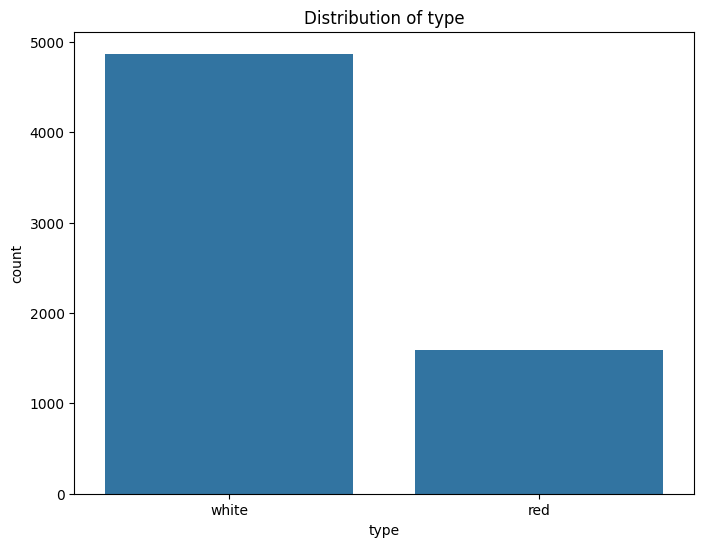

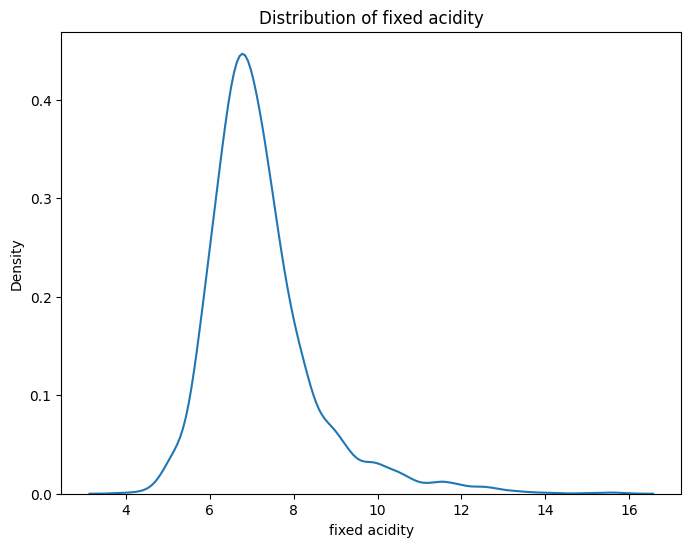

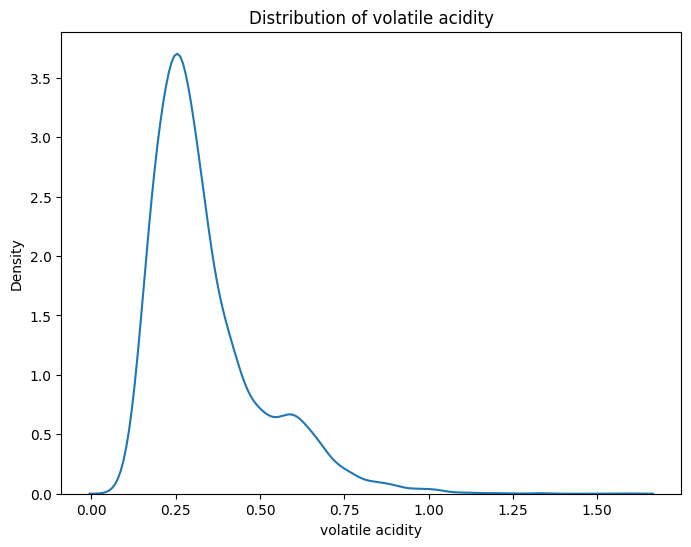

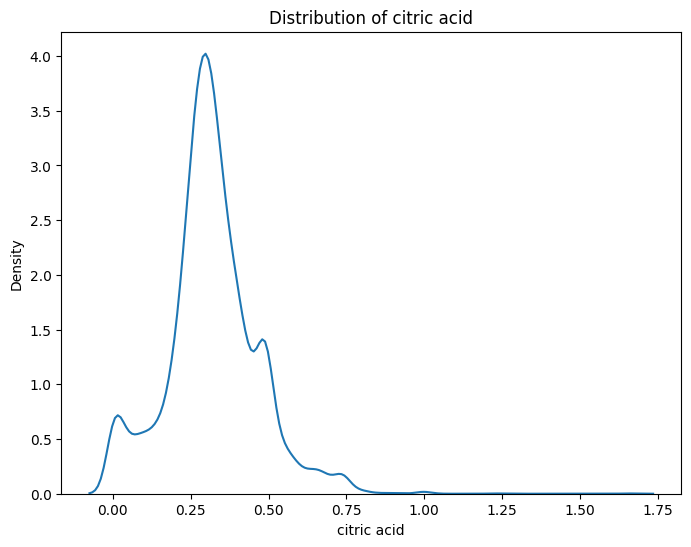

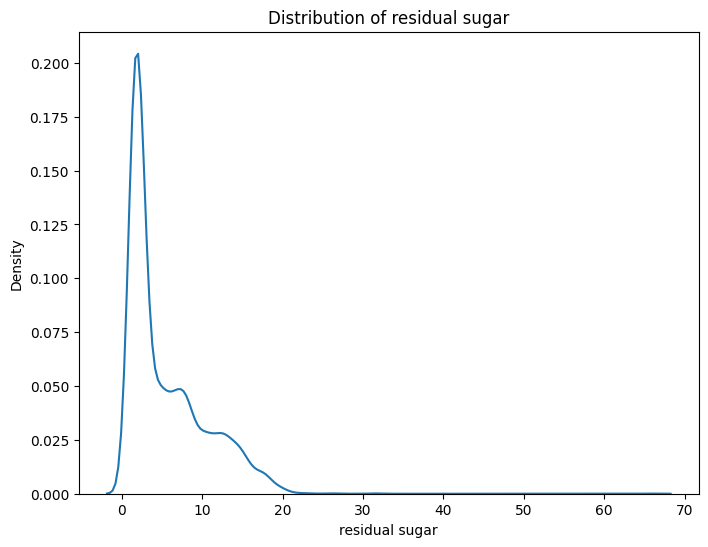

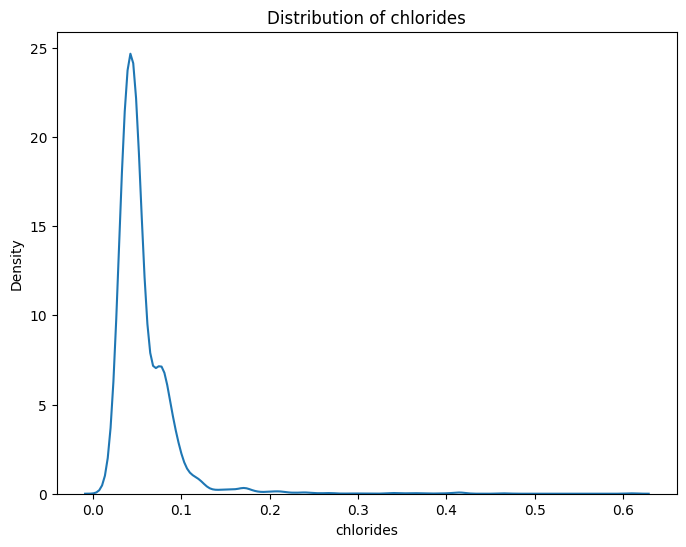

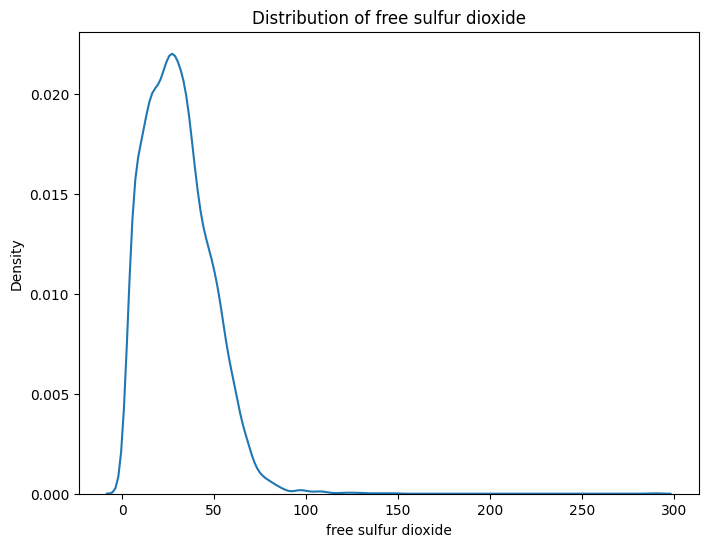

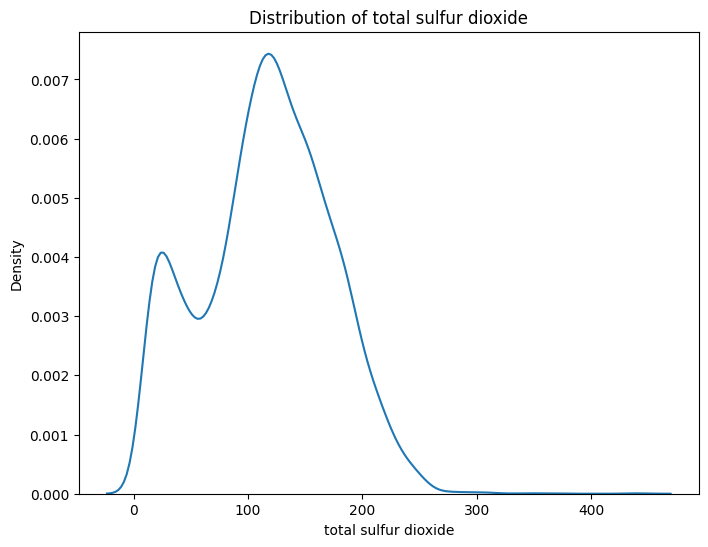

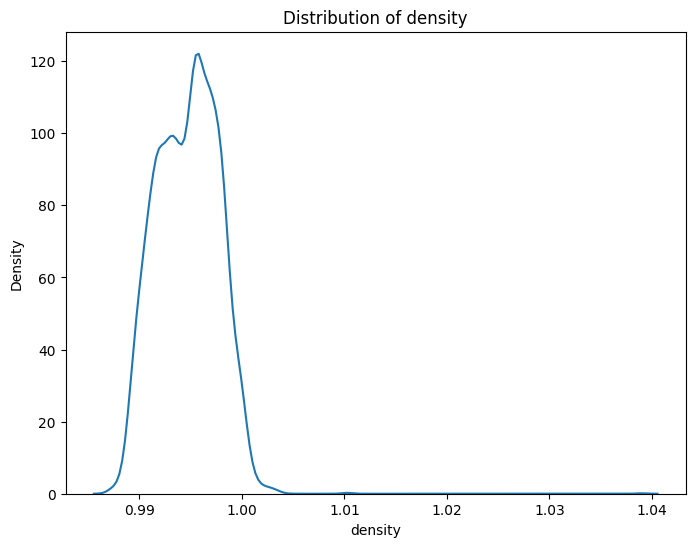

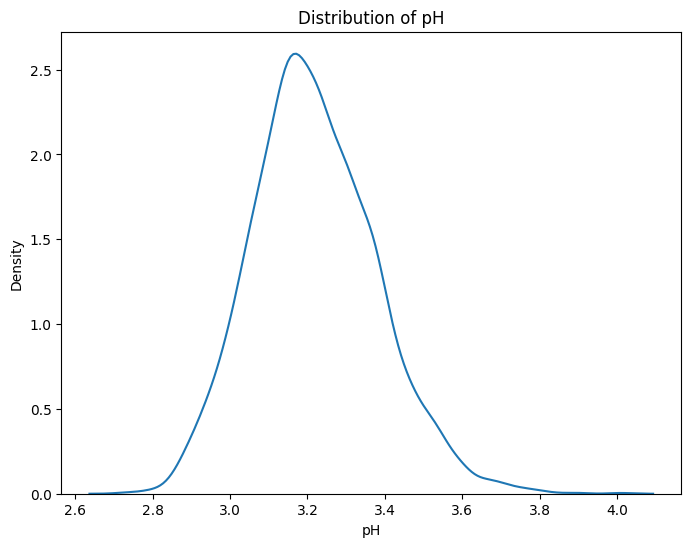

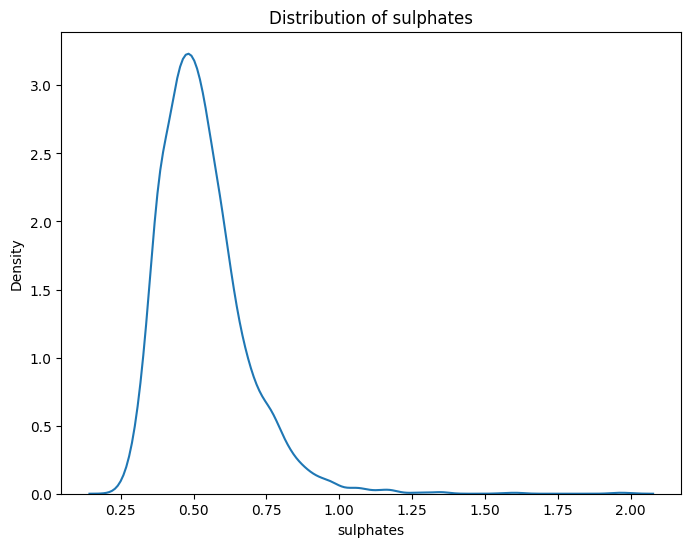

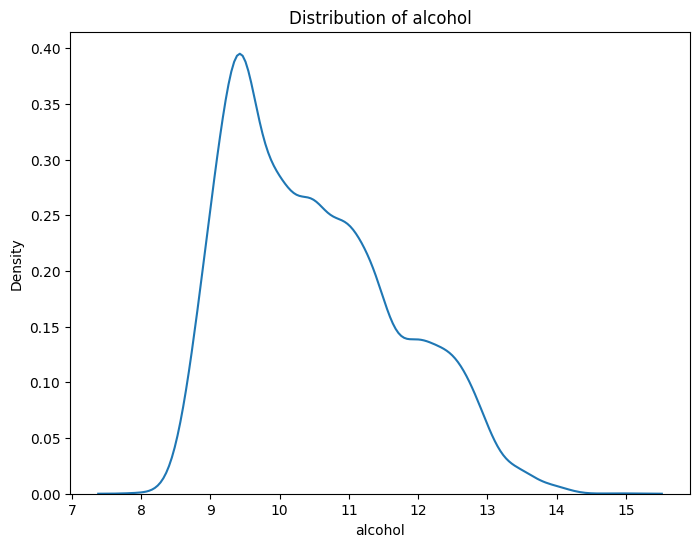

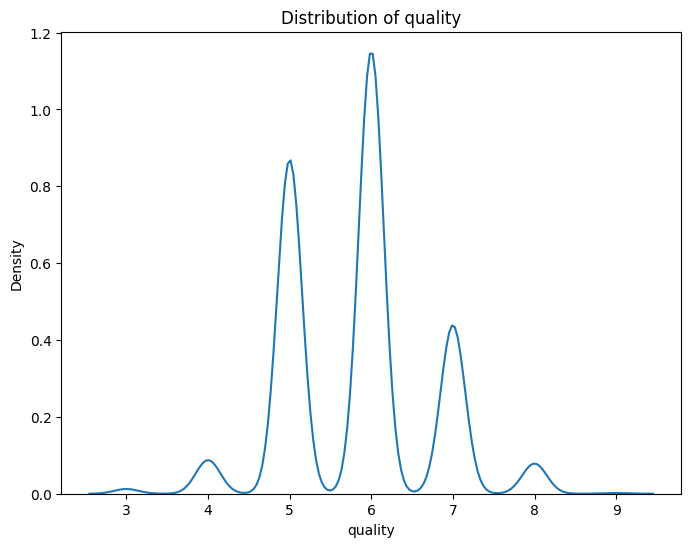

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

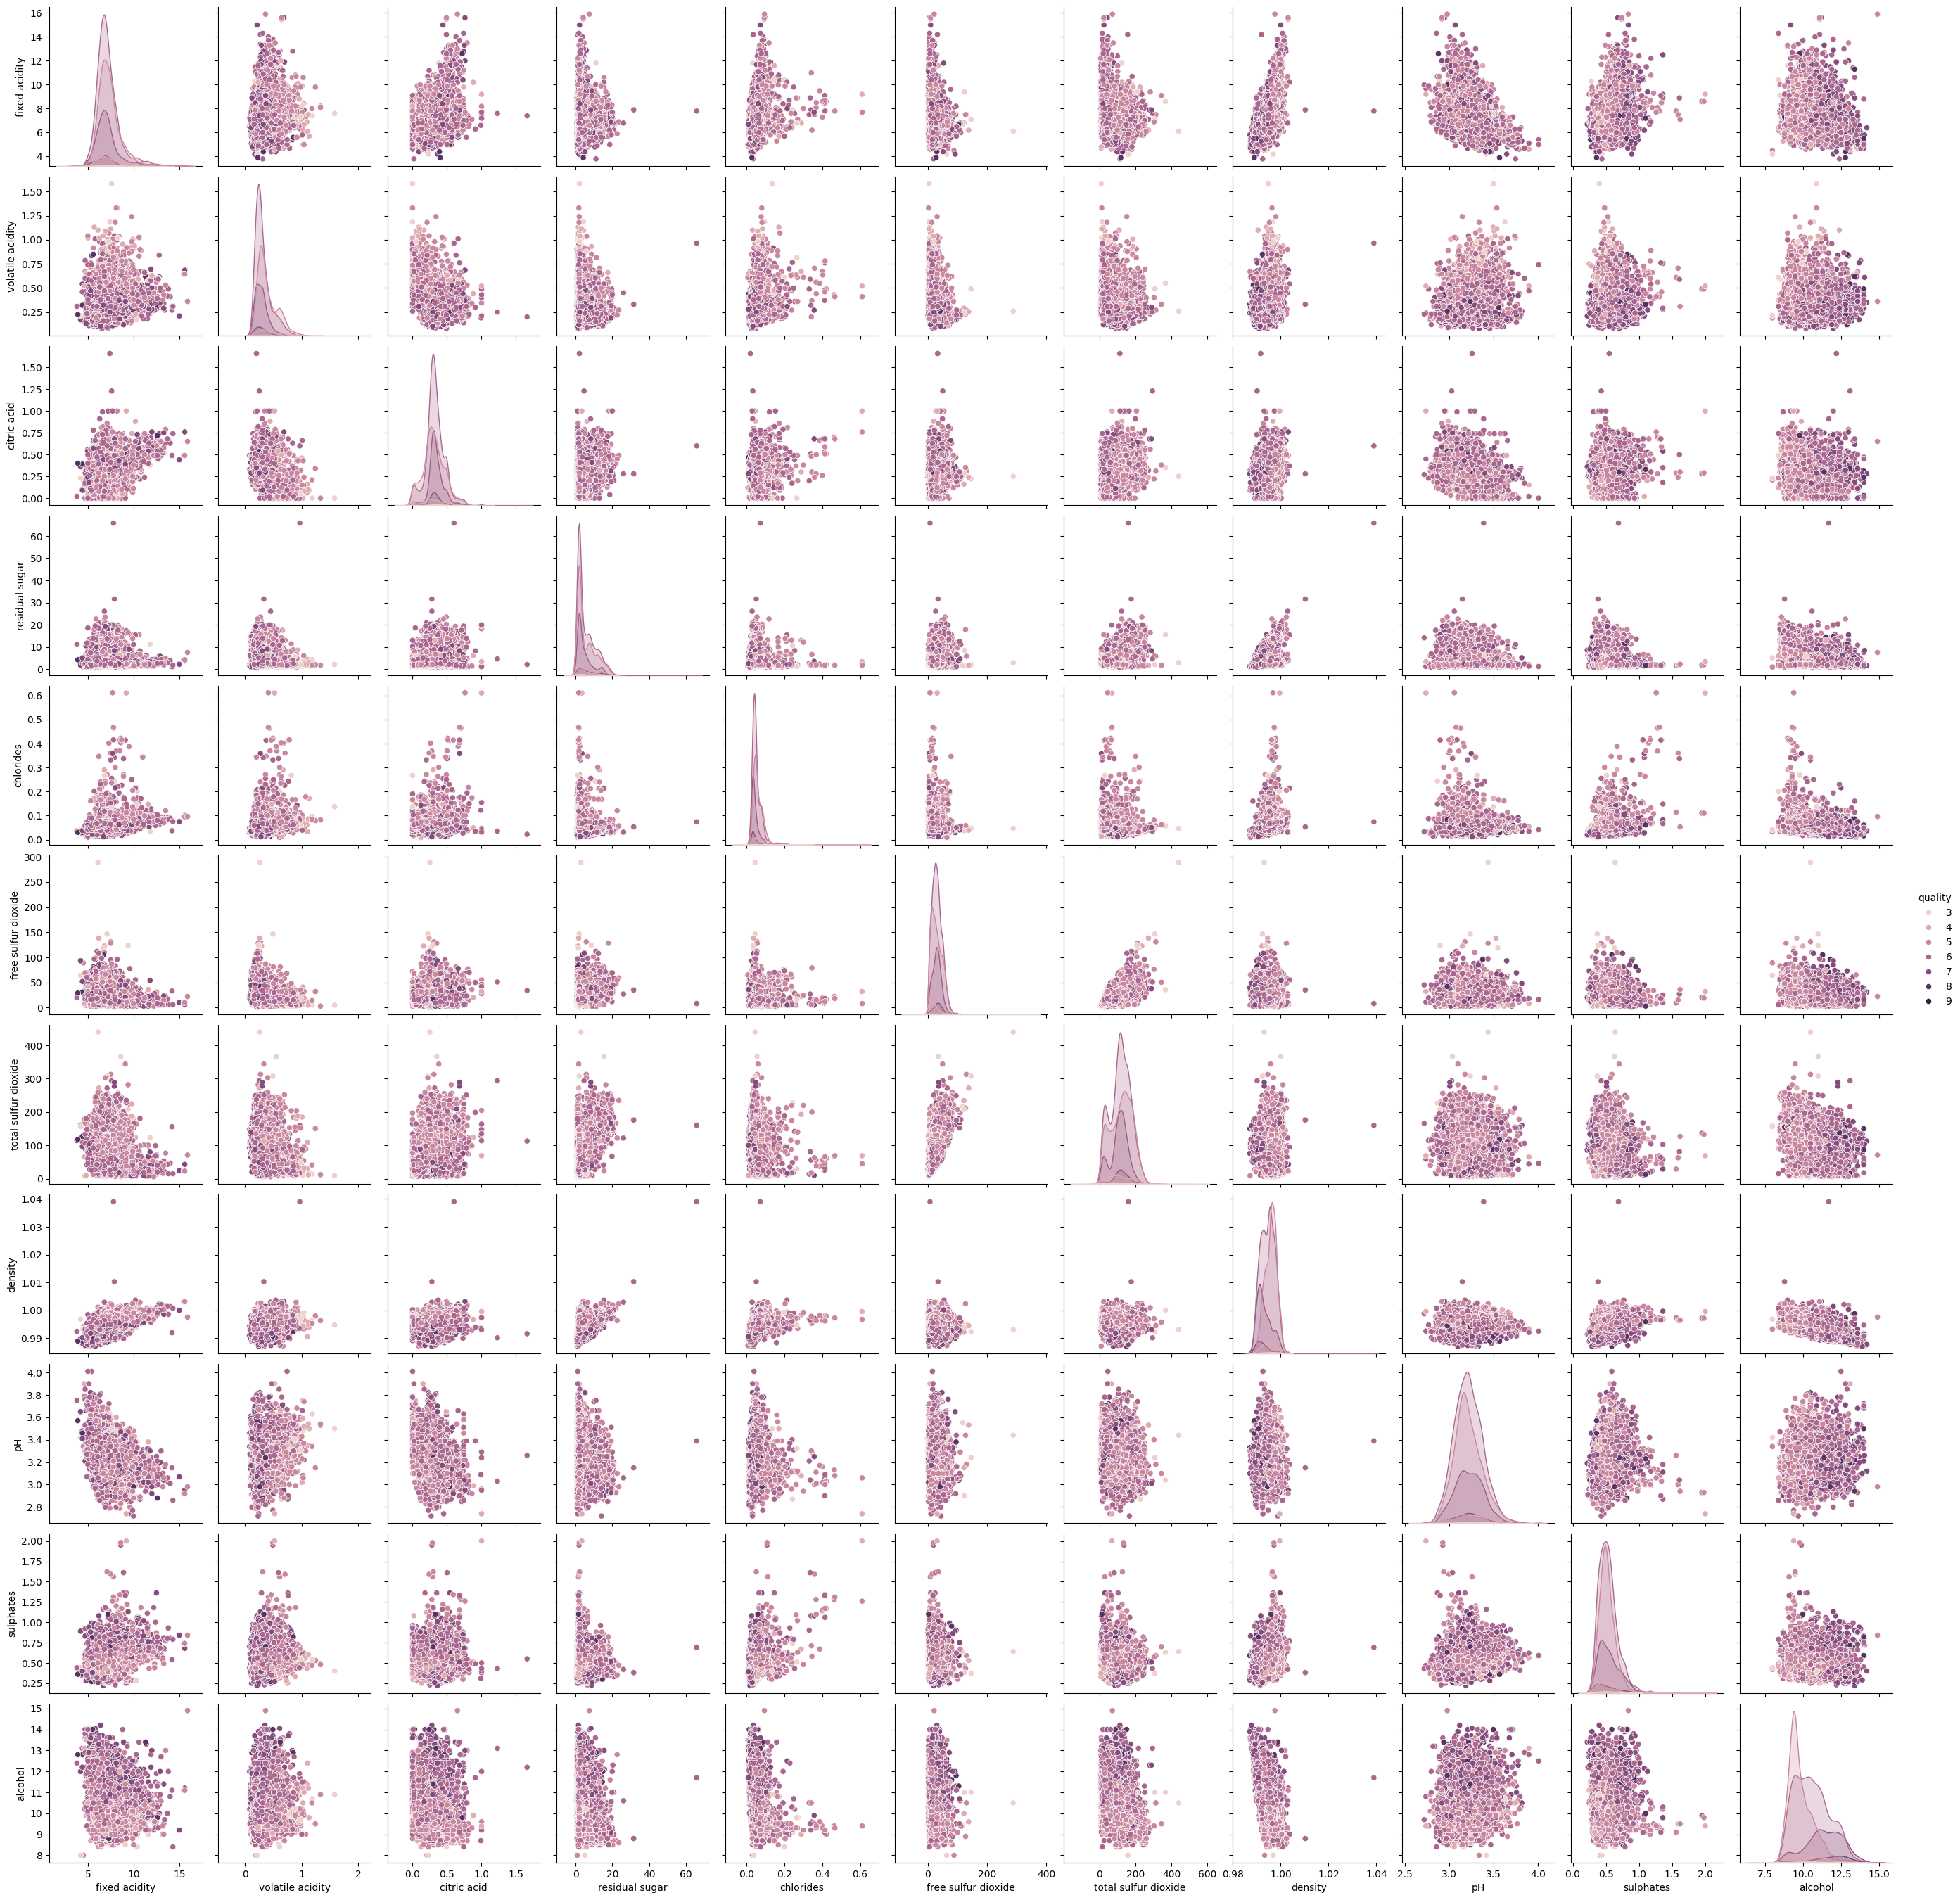

In [12]:
sns.pairplot(df, hue='quality')
plt.show()

In [ ]:
param_grid = {
    "criterion": ["gini", "entropy"],   # for classification
    "max_depth": [None, 5, 10, 20, 30],             # depth of tree
    "min_samples_split": [2, 5, 10, 20],            # min samples needed to split
    "min_samples_leaf": [1, 2, 5, 10],              # min samples at leaf node
    "max_features": ["sqrt", "log2"],         # number of features to consider
}


# Task
Load the dataset "winequalityN.csv", remove rows with null values, plot the shape of the data, plot bar plots with KDE for all columns, plot a pair plot colored by the target column, build a decision tree model using GridSearchCV with the parameter grid `param_grid = {'max_depth': [2, 5, 10, 15, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 5, 10]}`.

## Prepare the data

### Subtask:
Separate features (X) and target (y). Encode the 'type' column as it is categorical.


**Reasoning**:
Separate features (X) and target (y), and then apply one-hot encoding to the 'type' column in the features DataFrame.



In [13]:
X = df.drop('quality', axis=1)
y = df['quality']

X = pd.get_dummies(X, columns=['type'], drop_first=True)

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define the model

### Subtask:
Initialize a Decision Tree Classifier model.


**Reasoning**:
Initialize a Decision Tree Classifier model to prepare for hyperparameter tuning with GridSearchCV.



In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

## Define gridsearchcv

### Subtask:
Set up GridSearchCV with the Decision Tree model and the provided parameter grid.


**Reasoning**:
Set up GridSearchCV with the Decision Tree model and the provided parameter grid.



In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy"],   # for classification
    "max_depth": [None, 5, 10, 20, 30],             # depth of tree
    "min_samples_split": [2, 5, 10, 20],            # min samples needed to split
    "min_samples_leaf": [1, 2, 5, 10],              # min samples at leaf node
    "max_features": ["sqrt", "log2"],         # number of features to consider
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)

## Train the model

### Subtask:
Fit GridSearchCV to the training data to find the best hyperparameters.


**Reasoning**:
Fit the GridSearchCV object to the training data to find the best hyperparameters for the Decision Tree model.



In [17]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

## Evaluate the model

### Subtask:
Evaluate the performance of the best model on the test set.


**Reasoning**:
Evaluate the performance of the best model on the test set by getting the best estimator, making predictions, and calculating classification metrics.



In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.5947
Precision: 0.5935
Recall: 0.5947
F1-score: 0.5936


## Summary:

### Data Analysis Key Findings

*   The dataset initially contained rows with null values, which were removed before analysis and modeling.
*   The best Decision Tree model, found using GridSearchCV with cross-validation, achieved an accuracy of approximately 0.5947 on the test set.
*   The weighted average precision, recall, and F1-score on the test set were approximately 0.5935, 0.5947, and 0.5936, respectively.
*   GridSearchCV identified the optimal hyperparameters for the Decision Tree classifier within the specified parameter grid, although a warning about class imbalance was noted during the fitting process.

### Insights or Next Steps

*   The current model performance is moderate. Further steps could involve exploring other classification algorithms or techniques to address potential class imbalance and improve predictive performance.
*   Feature engineering or selection could potentially enhance the model's ability to distinguish between different wine quality levels.


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.16      0.17      0.16        48
           5       0.67      0.64      0.66       430
           6       0.62      0.66      0.64       540
           7       0.55      0.51      0.53       228
           8       0.32      0.29      0.30        42
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1293
   macro avg       0.33      0.32      0.33      1293
weighted avg       0.59      0.59      0.59      1293



In [20]:
import pandas as pd

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                 feature  importance
10               alcohol    0.153637
1       volatile acidity    0.102283
3         residual sugar    0.088929
5    free sulfur dioxide    0.088359
7                density    0.085801
0          fixed acidity    0.084788
9              sulphates    0.082721
2            citric acid    0.080943
6   total sulfur dioxide    0.079111
8                     pH    0.076661
4              chlorides    0.074639
11            type_white    0.002128


In [21]:
%pip install graphviz

## Export the tree

### Subtask:
Use `export_graphviz` to generate the dot representation of the tree.


**Reasoning**:
Use export_graphviz to generate the dot representation of the tree.



In [22]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(best_model, out_file=None, feature_names=X_train.columns, filled=True, rounded=True)

## Visualize the tree

### Subtask:
Render the dot representation as a graph.


**Reasoning**:
Render the dot representation as a graph using graphviz.



In [23]:
import graphviz

graph = graphviz.Source(dot_data)
display(graph)

# Task
Analyze the wine quality dataset provided in the file "winequalityN.csv". Clean the data by removing rows with null values. Visualize the distribution of each feature using bar plots with KDE. Create a pair plot of all features, colored by the target variable. Build a decision tree classification model using GridSearchCV with the parameter grid `{'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}`. Print the classification report, feature importance, and visualize the best decision tree model. Finally, plot a confusion matrix heatmap for the best model.

## Calculate confusion matrix

### Subtask:
Compute the confusion matrix using the true and predicted values.


**Reasoning**:
Calculate the confusion matrix using the true and predicted values.



In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

## Create heatmap

### Subtask:
Generate a heatmap of the confusion matrix.


**Reasoning**:
Generate a heatmap of the confusion matrix to visualize the model's performance in classifying different wine quality levels.



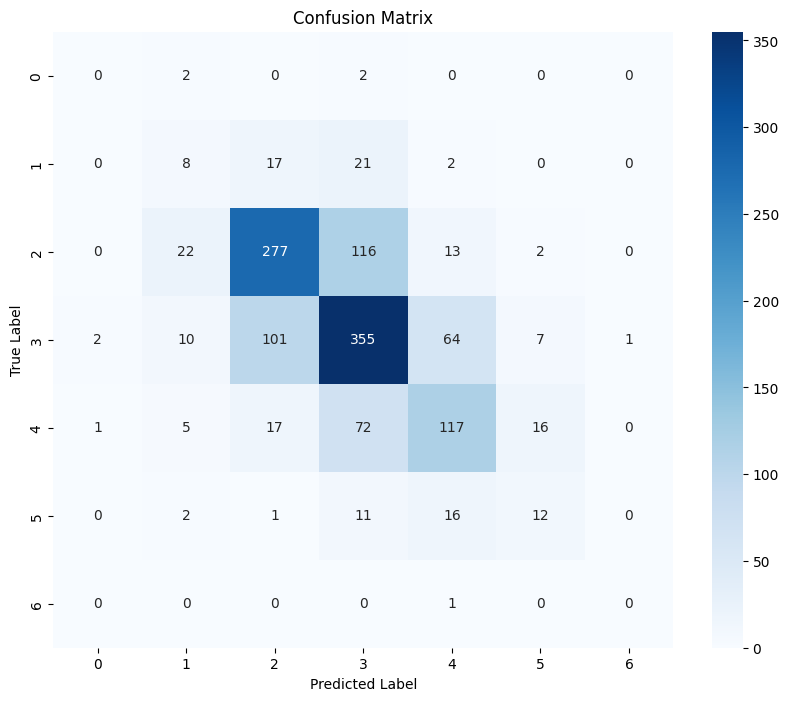

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   A confusion matrix was computed using the true and predicted labels (`y_test` and `y_pred`) to evaluate the classification model's performance.
*   A heatmap visualization of the confusion matrix was successfully generated using `seaborn.heatmap`, providing a visual representation of the model's predictions against the true labels.

### Insights or Next Steps

*   Analyze the confusion matrix heatmap to identify which wine quality classes the model struggles to predict accurately (e.g., high false positives or false negatives for specific classes).
*   Consider further model tuning or exploring different classification algorithms to improve performance, particularly for classes with high misclassification rates observed in the confusion matrix.


## Define the model

### Subtask:
Initialize a Random Forest Classifier model.


**Reasoning**:
Initialize a RandomForestClassifier model.



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

## Perform cross-validation

### Subtask:
Use cross_val_score to perform 5-fold cross-validation.


**Reasoning**:
Use cross_val_score to perform 5-fold cross-validation and store the results.



In [27]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


**Reasoning**:
Print the cross-validation scores.



In [28]:
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.65087041 0.69922631 0.67988395 0.65280464 0.67988395]


## Print cross-validation results

### Subtask:
Display the results of the cross-validation.


In [30]:
# Fit the Random Forest model on the entire training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.04      0.07        48
           5       0.72      0.71      0.72       430
           6       0.63      0.79      0.70       540
           7       0.67      0.52      0.59       228
           8       0.85      0.26      0.40        42
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1293
   macro avg       0.44      0.33      0.35      1293
weighted avg       0.66      0.67      0.65      1293



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Calculate and print the mean and standard deviation of the cross-validation scores.



In [29]:
import numpy as np

print(f"Mean cross-validation score: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of cross-validation scores: {np.std(cv_scores):.4f}")

Mean cross-validation score: 0.6725
Standard deviation of cross-validation scores: 0.0183


## Summary:

### Data Analysis Key Findings

*   The Random Forest model achieved a mean cross-validation accuracy of approximately 0.6725 over 5 folds.
*   The standard deviation of the cross-validation scores was approximately 0.0183, indicating relatively consistent performance across the folds.
*   The individual cross-validation scores ranged from approximately 0.6509 to 0.6992.
*   A warning was noted during cross-validation regarding the small size of the least populated class relative to the number of cross-validation splits.

### Insights or Next Steps

*   The cross-validation scores suggest that the Random Forest model provides a moderate level of predictive accuracy for this dataset.
*   Given the warning about the small class size, consider techniques for handling imbalanced datasets (e.g., oversampling, undersampling, or using stratified cross-validation if not already applied) in future modeling steps to potentially improve performance and ensure robust evaluation.


# Task
Generate a heatmap of the confusion matrix for the predictions made by the Random Forest model.

## Calculate confusion matrix

### Subtask:
Compute the confusion matrix using the true values (`y_test`) and the predictions from the Random Forest model (`y_pred_rf`).


In [31]:
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

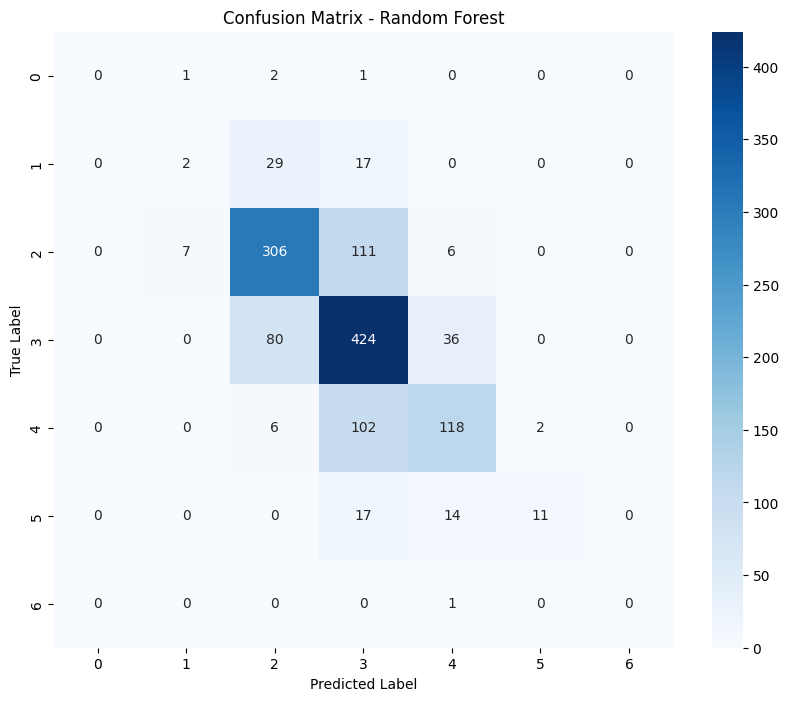

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Random Forests are an ensemble learning method that builds multiple decision trees and combines their predictions. Even without explicit hyperparameter tuning, this ensemble approach often leads to better performance than a single decision tree because it reduces overfitting and is more robust to noise and outliers in the data. The diversity of the trees in the forest helps to average out the errors, resulting in a more generalized and accurate model.

In [33]:
import pandas as pd

feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance_rf)

Feature Importance (Random Forest):
                 feature  importance
10               alcohol    0.124474
7                density    0.099965
1       volatile acidity    0.099282
6   total sulfur dioxide    0.089734
5    free sulfur dioxide    0.088556
4              chlorides    0.086613
9              sulphates    0.084782
3         residual sugar    0.084688
8                     pH    0.083846
2            citric acid    0.079412
0          fixed acidity    0.074776
11            type_white    0.003871


# Task
Compare the feature importances of the Decision Tree and Random Forest models using a bar plot.

## Combine feature importance data

### Subtask:
Merge the feature importance dataframes from both models.


**Reasoning**:
Rename the importance columns and merge the two feature importance dataframes.



In [34]:
feature_importance = feature_importance.rename(columns={'importance': 'Decision Tree Importance'})
feature_importance_rf = feature_importance_rf.rename(columns={'importance': 'Random Forest Importance'})
combined_feature_importance = pd.merge(feature_importance, feature_importance_rf, on='feature')
display(combined_feature_importance)

feature  Decision Tree Importance  Random Forest Importance
0                alcohol                  0.153637                  0.124474
1       volatile acidity                  0.102283                  0.099282
2         residual sugar                  0.088929                  0.084688
3    free sulfur dioxide                  0.088359                  0.088556
4                density                  0.085801                  0.099965
5          fixed acidity                  0.084788                  0.074776
6              sulphates                  0.082721                  0.084782
7            citric acid                  0.080943                  0.079412
8   total sulfur dioxide                  0.079111                  0.089734
9                     pH                  0.076661                  0.083846
10             chlorides                  0.074639                  0.086613
11            type_white                  0.002128                  0.003871

## Reshape data

### Subtask:
Melt the combined dataframe into a long format suitable for plotting.


**Reasoning**:
Melt the combined feature importance dataframe into a long format for plotting.



In [35]:
melted_feature_importance = pd.melt(combined_feature_importance, id_vars='feature', var_name='Model', value_name='Importance')
display(melted_feature_importance)

feature                     Model  Importance
0                alcohol  Decision Tree Importance    0.153637
1       volatile acidity  Decision Tree Importance    0.102283
2         residual sugar  Decision Tree Importance    0.088929
3    free sulfur dioxide  Decision Tree Importance    0.088359
4                density  Decision Tree Importance    0.085801
5          fixed acidity  Decision Tree Importance    0.084788
6              sulphates  Decision Tree Importance    0.082721
7            citric acid  Decision Tree Importance    0.080943
8   total sulfur dioxide  Decision Tree Importance    0.079111
9                     pH  Decision Tree Importance    0.076661
10             chlorides  Decision Tree Importance    0.074639
11            type_white  Decision Tree Importance    0.002128
12               alcohol  Random Forest Importance    0.124474
13      volatile acidity  Random Forest Importance    0.099282
14        residual sugar  Random Forest Importance    0.084688
15   free sulfur dioxide  Random Forest Importance    0.088556
16               density  Random Forest Importance    0.099965
17         fixed acidity  Random Forest Importance    0.074776
18             sulphates  Random Forest Importance    0.084782
19           citric acid  Random Forest Importance    0.079412
20  total sulfur dioxide  Random Forest Importance    0.089734
21                    pH  Random Forest Importance    0.083846
22             chlorides  Random Forest Importance    0.086613
23            type_white  Random Forest Importance    0.003871

## Create bar plot

### Subtask:
Generate a bar plot using seaborn, with different colors for each model's importance values.


**Reasoning**:
Generate a bar plot using seaborn to compare the feature importances of the Decision Tree and Random Forest models.



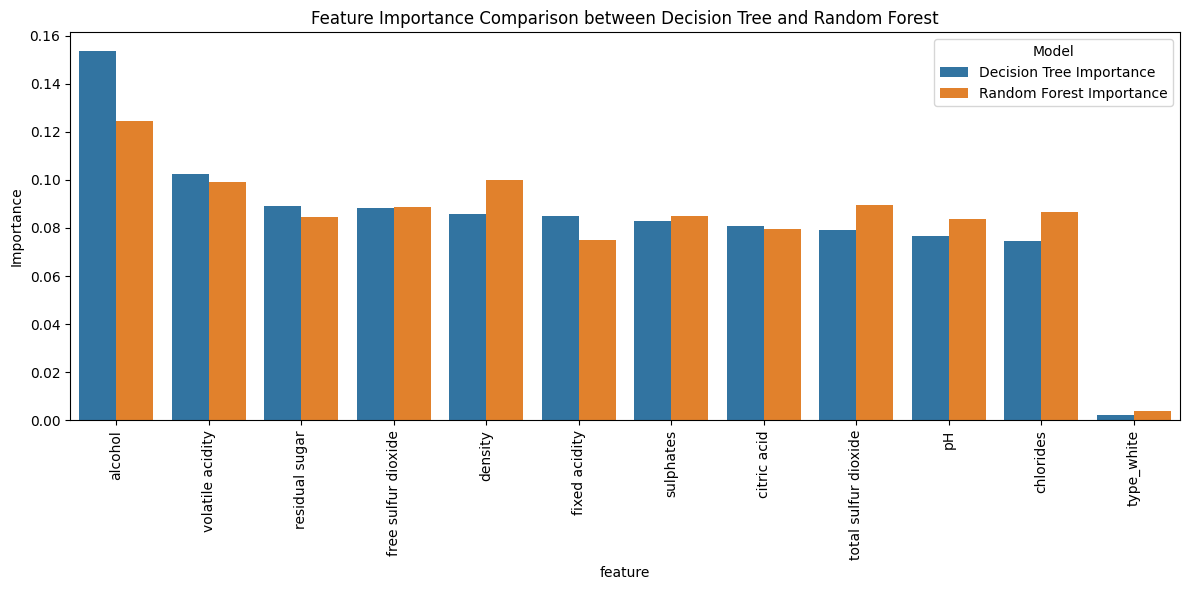

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='Importance', hue='Model', data=melted_feature_importance)
plt.xticks(rotation=90)
plt.title('Feature Importance Comparison between Decision Tree and Random Forest')
plt.tight_layout()
plt.show()

## Display plot

### Subtask:
Show the generated bar plot.


## Summary:

### Data Analysis Key Findings

*   The feature importance data from both the Decision Tree and Random Forest models were successfully combined into a single dataframe.
*   The combined data was reshaped into a long format suitable for plotting using `pd.melt()`.
*   A bar plot was generated comparing the feature importances assigned by the Decision Tree and Random Forest models for each feature.
*   The bar plot visually shows the differences in feature importance between the two models.

### Insights or Next Steps

*   Analyze the bar plot to identify which features are considered most important by each model and note any significant discrepancies.
*   Consider further investigation into features where the models assign vastly different importance scores to understand why this difference exists.


In [37]:
import seaborn as sns

iris = sns.load_dataset('iris')
display(iris.head())

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

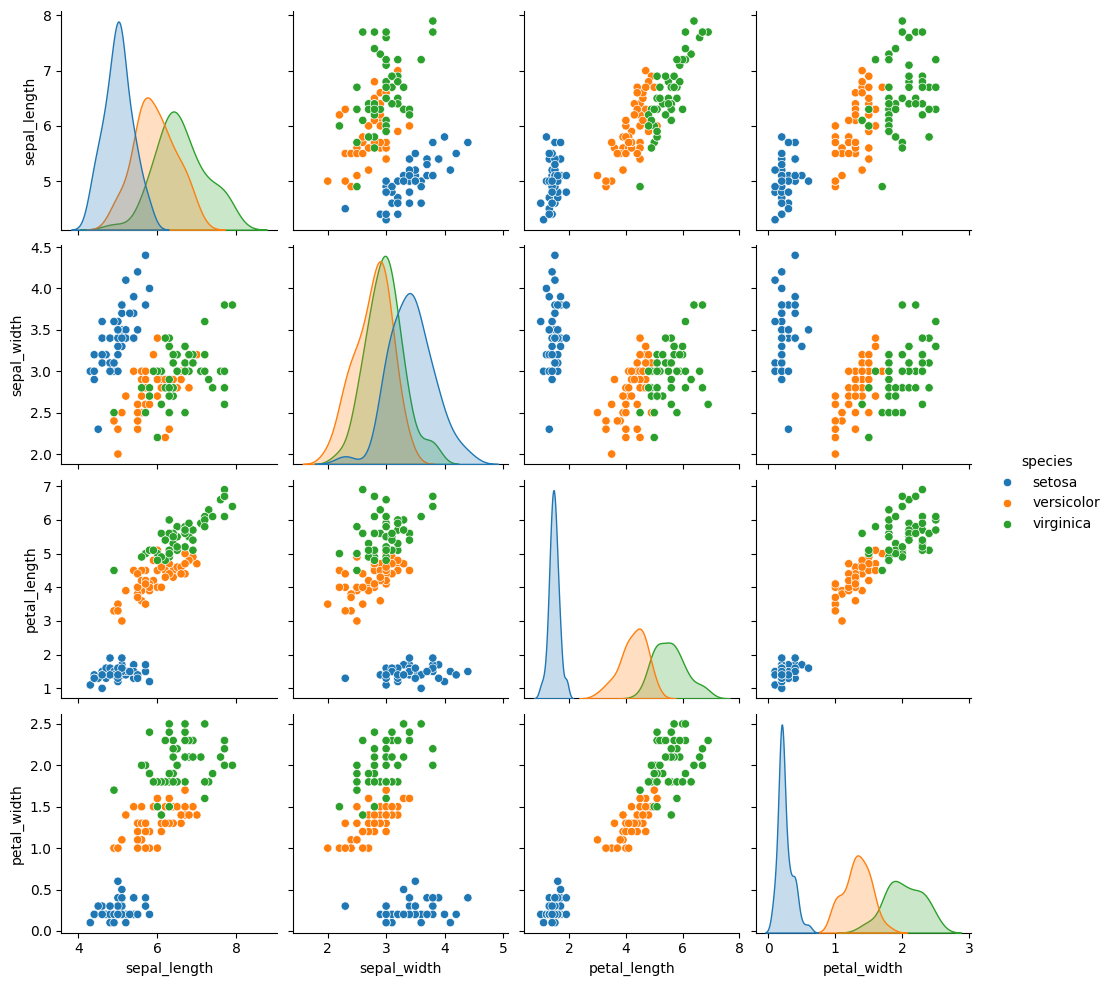

In [38]:
sns.pairplot(iris, hue='species')
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features
X_iris = iris.drop('species', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_iris_scaled = scaler.fit_transform(X_iris)

In [40]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model to the standardized data
kmeans.fit(X_iris_scaled)

# Get the cluster labels
cluster_labels = kmeans.labels_

In [41]:
iris_clustered = iris.copy()
iris_clustered['cluster'] = cluster_labels
display(iris_clustered.head())

sepal_length  sepal_width  petal_length  petal_width species  cluster
0           5.1          3.5           1.4          0.2  setosa        1
1           4.9          3.0           1.4          0.2  setosa        1
2           4.7          3.2           1.3          0.2  setosa        1
3           4.6          3.1           1.5          0.2  setosa        1
4           5.0          3.6           1.4          0.2  setosa        1

In [43]:
iris_clustered.drop('species', axis=1, inplace=True)

In [44]:
display(iris_clustered.head())

sepal_length  sepal_width  petal_length  petal_width  cluster
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1

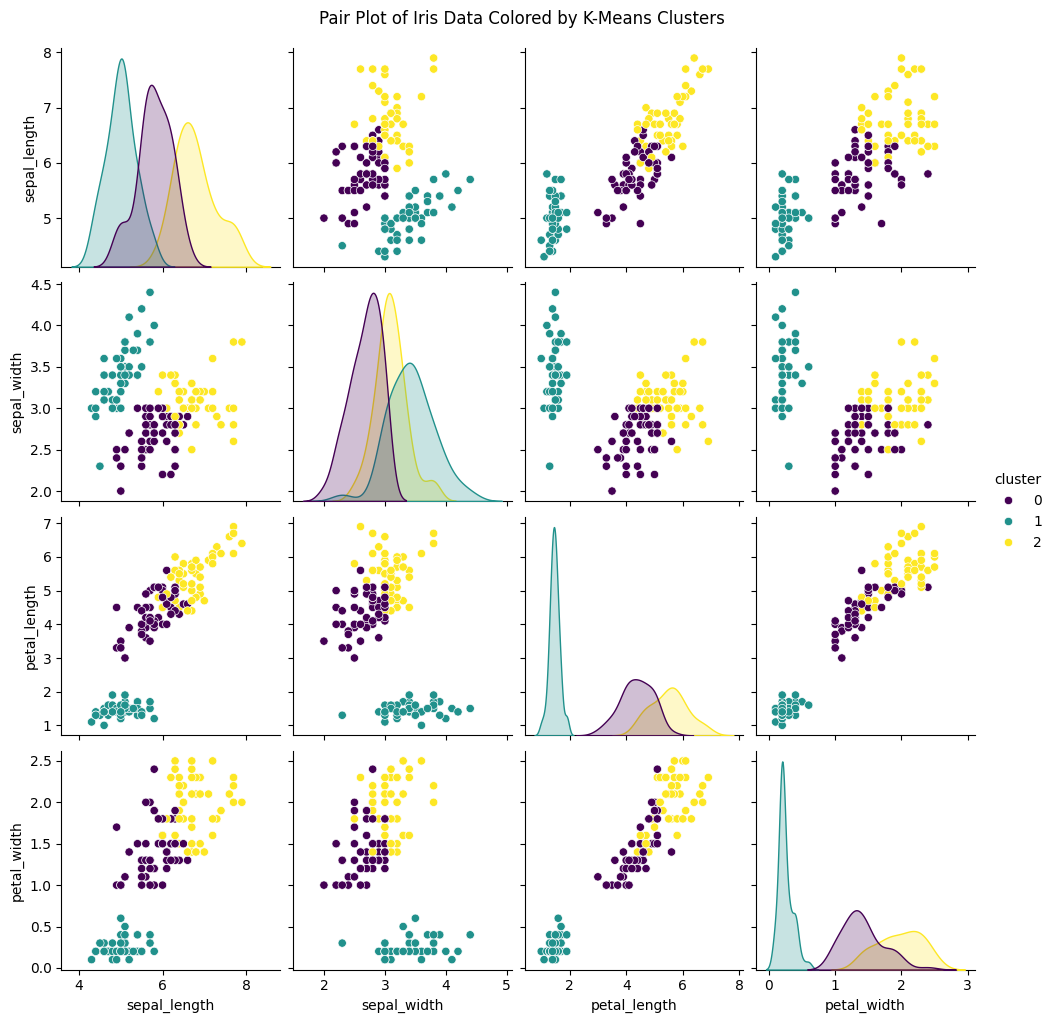

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(iris_clustered, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot of Iris Data Colored by K-Means Clusters', y=1.02)
plt.show()

In [46]:
iris_pca = iris.copy()

In [47]:
from sklearn.decomposition import PCA

# Select the numerical features for PCA
X_iris_pca = iris_pca.drop('species', axis=1)

# Initialize PCA and fit to the data
pca = PCA(n_components=2) # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_iris_pca)

In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_pca = StandardScaler()

# Standardize the PCA results
X_pca_scaled = scaler_pca.fit_transform(X_pca)

In [49]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with 3 clusters
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model to the standardized PCA results
kmeans_pca.fit(X_pca_scaled)

# Get the cluster labels
cluster_labels_pca = kmeans_pca.labels_

In [50]:
import pandas as pd

# Create a DataFrame with the PCA results and cluster labels
pca_clustered_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_clustered_df['cluster'] = cluster_labels_pca

display(pca_clustered_df.head())


PC1       PC2  cluster
0 -2.684126  0.319397        2
1 -2.714142 -0.177001        2
2 -2.888991 -0.144949        2
3 -2.745343 -0.318299        2
4 -2.728717  0.326755        2

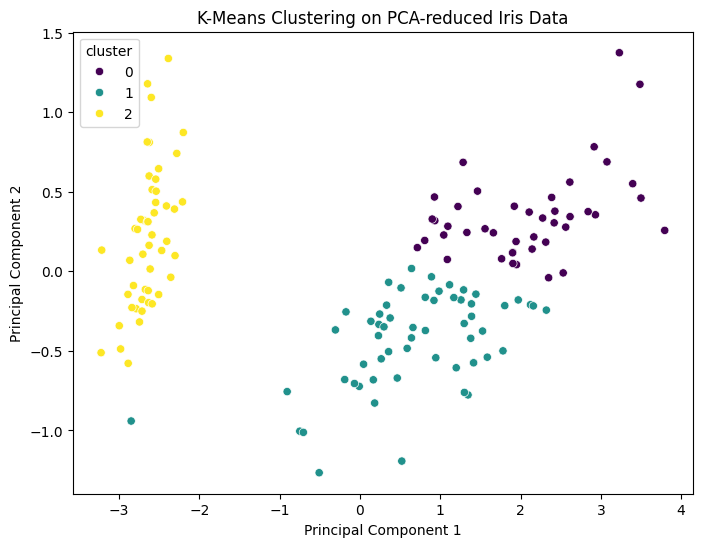

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_clustered_df, palette='viridis')
plt.title('K-Means Clustering on PCA-reduced Iris Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Based on visual inspection of the pair plots, K-Means clustering on the PCA-reduced data appears to provide slightly better separation of the clusters, particularly for distinguishing the two non-setosa clusters. This suggests that PCA helped in finding a lower-dimensional representation where the clusters are more clearly defined for K-Means to identify.

In [53]:
from sklearn.metrics import adjusted_rand_score

# Calculate ARI for K-Means on PCA-reduced scaled data
ari_pca = adjusted_rand_score(true_labels, cluster_labels_pca)

print(f"Adjusted Rand Index for K-Means on PCA-reduced scaled data: {ari_pca:.4f}")

Adjusted Rand Index for K-Means on PCA-reduced scaled data: 0.5321


In [52]:
from sklearn.metrics import adjusted_rand_score

# Get the true species labels
true_labels = iris['species']

# Calculate ARI for K-Means on original scaled data
ari_original = adjusted_rand_score(true_labels, cluster_labels)

print(f"Adjusted Rand Index for K-Means on original scaled data: {ari_original:.4f}")

Adjusted Rand Index for K-Means on original scaled data: 0.6201
